In [ ]:
import zipfile
import os

In [ ]:
%cd /content/musicautobot/data/midi
!wget 'https://storage.googleapis.com/magentadata/datasets/maestro/v2.0.0/maestro-v2.0.0-midi.zip'
!unzip -j maestro-v2.0.0-midi.zip

[Errno 2] No such file or directory: '/content/musicautobot/data/midi'
/content
--2022-01-12 12:12:56--  https://storage.googleapis.com/magentadata/datasets/maestro/v2.0.0/maestro-v2.0.0-midi.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.194.128, 173.194.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59243107 (56M) [application/zip]
Saving to: ‘maestro-v2.0.0-midi.zip’

maestro-v2.0.0-midi 100%[===================>]  56.50M   197MB/s    in 0.3s    

2022-01-12 12:12:57 (197 MB/s) - ‘maestro-v2.0.0-midi.zip’ saved [59243107/59243107]

Archive:  maestro-v2.0.0-midi.zip
  inflating: maestro-v2.0.0.csv      
  inflating: MIDI-Unprocessed_13_R1_2008_01-04_ORIG_MID--AUDIO_13_R1_2008_wav--1.midi  
  inflating: MIDI-Unprocessed_03_R1_2008_01-04_ORIG_MID--AUDIO_03_R1_2008_wav--1.midi  
  inflating: MIDI-Unprocessed_17_R1_2008_01-04_ORI

In [ ]:
from music21 import *
import numpy as np

In [ ]:
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)

    #Looping over all the instruments
    for part in s2.parts:
    
        #select elements of only piano
        if 'Piano' in str(part): 
        
            notes_to_parse = part.recurse() 
      
            #finding whether a particular element is note or a chord
            for element in notes_to_parse:
                
                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                
                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

In [ ]:
read_midi('/content/MIDI-Unprocessed_12_R2_2011_MID--AUDIO_R2-D4_04_Track04_wav.midi')

Loading Music File: /content/MIDI-Unprocessed_12_R2_2011_MID--AUDIO_R2-D4_04_Track04_wav.midi


array(['B-4', 'F#2', 'C#3', ..., 'F#3', 'F#2', '1.6'], dtype='<U4')

In [ ]:

import os

#Array Processing
import numpy as np

#specify the path
path='/content/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".midi")]


In [ ]:
data = files[:100]

In [ ]:
notes_array = np.array([read_midi(path+i) for i in data])

Loading Music File: /content/MIDI-Unprocessed_XP_03_R1_2004_01-02_ORIG_MID--AUDIO_03_R1_2004_01_Track01_wav.midi
Loading Music File: /content/MIDI-Unprocessed_XP_08_R1_2004_01-02_ORIG_MID--AUDIO_08_R1_2004_01_Track01_wav.midi
Loading Music File: /content/MIDI-Unprocessed_09_R1_2006_01-04_ORIG_MID--AUDIO_09_R1_2006_03_Track03_wav.midi
Loading Music File: /content/MIDI-Unprocessed_Recital1-3_MID--AUDIO_02_R1_2018_wav--2.midi
Loading Music File: /content/MIDI-Unprocessed_Recital5-7_MID--AUDIO_06_R1_2018_wav--2.midi
Loading Music File: /content/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MID--AUDIO_17_R1_2006_02_Track02_wav.midi
Loading Music File: /content/MIDI-Unprocessed_17_R1_2011_MID--AUDIO_R1-D7_04_Track04_wav.midi
Loading Music File: /content/MIDI-Unprocessed_R1_D1-1-8_mid--AUDIO-from_mp3_03_R1_2015_wav--4.midi
Loading Music File: /content/MIDI-Unprocessed_070_PIANO070_MID--AUDIO-split_07-08-17_Piano-e_1-02_wav--3.midi
Loading Music File: /content/MIDI-Unprocessed_21_R1_2011_MID--AUDIO_R

KeyboardInterrupt: ignored

In [ ]:
notes_array

In [ ]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

In [ ]:

#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)


In [ ]:
new_music=[]
frequent_notes = [note_ for note_, count in freq.items() if count>=50]
print(len(frequent_notes))
for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)
    
new_music = np.array(new_music)

In [ ]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [ ]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

In [ ]:
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

In [ ]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [ ]:
import tensorflow as tf


In [ ]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')



In [ ]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=50, validation_data=(np.array(x_val),np.array(y_val)),verbose=1)

Epoch 1/50
73/73 [==============================] - 11s 19ms/step - loss: 3.8405 - val_loss: 3.8259
Epoch 2/50
73/73 [==============================] - 1s 14ms/step - loss: 3.7292 - val_loss: 3.7095
Epoch 3/50
73/73 [==============================] - 1s 13ms/step - loss: 3.6084 - val_loss: 3.6125
Epoch 4/50
73/73 [==============================] - 1s 13ms/step - loss: 3.5528 - val_loss: 3.5908
Epoch 5/50
73/73 [==============================] - 1s 13ms/step - loss: 3.5138 - val_loss: 3.5662
Epoch 6/50
73/73 [==============================] - 1s 13ms/step - loss: 3.4838 - val_loss: 3.5476
Epoch 7/50
73/73 [==============================] - 1s 14ms/step - loss: 3.4536 - val_loss: 3.5364
Epoch 8/50
73/73 [==============================] - 1s 13ms/step - loss: 3.4197 - val_loss: 3.5313
Epoch 9/50
73/73 [==============================] - 1s 13ms/step - loss: 3.3890 - val_loss: 3.5241
Epoch 10/50
73/73 [==============================] - 1s 13ms/step - loss: 3.3591 - val_loss: 3.5228
Epoch 11

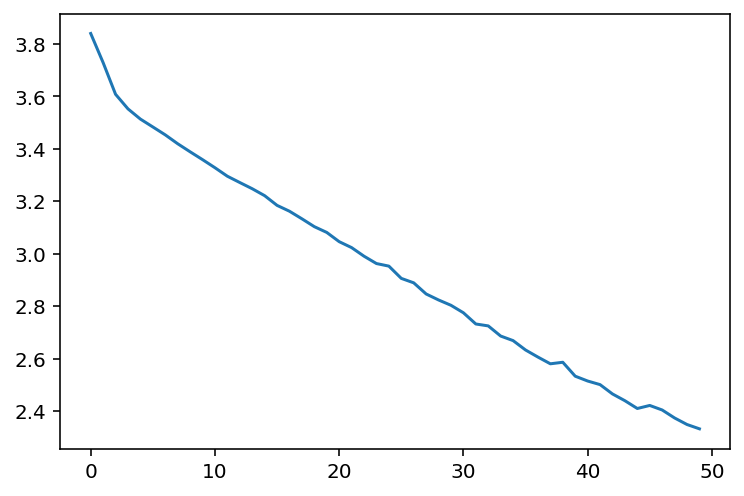

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [ ]:
import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]
for i in range(10):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

[18, 11, 18, 53, 53, 53, 45, 38, 29, 29]


In [ ]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]

In [ ]:
def convert_to_midi(prediction_output):
   
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
                
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='/content/result/music.mid')

In [ ]:
convert_to_midi(predicted_notes)